<a href="https://colab.research.google.com/github/g-tumwesigye/fitpulse_app/blob/main/fitpulse_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import numpy as np
import pandas as pd
fitpulse_dataset = pd.read_csv('/content/fitpulse_dataset.csv')
fitpulse_dataset.head()


,Weight,Height,BMI,Body Fat Percentage,BFPcase,Gender,Age,BMIcase,Exercise Recommendation Plan
0,76.811975,1.820521,23.175956,18.281148,Acceptable,Male,29,normal,4
1,77.721154,1.945498,20.534184,13.731021,Fitness,Male,23,normal,4
2,87.558726,1.742754,28.828859,42.304631,Obese,Female,57,over weight,5
3,89.473356,1.758318,28.940017,27.958021,Obese,Male,41,over weight,5
4,69.963943,1.722570,23.578732,16.464478,Fitness,Male,19,normal,4


In [133]:
# Let's check the column names and data types
print("Column Names and Data Types:")
print(fitpulse_dataset.dtypes)

# Let's also check for missing values
print("\nMissing Values:")
print(fitpulse_dataset.isnull().sum())

# Let's get basic descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(fitpulse_dataset.describe())


Column Names and Data Types:
Weight                          float64
Height                          float64
BMI                             float64
Body Fat Percentage             float64
BFPcase                          object
Gender                           object
Age                               int64
BMIcase                          object
Exercise Recommendation Plan      int64
dtype: object

Missing Values:
Weight                          0
Height                          0
BMI                             0
Body Fat Percentage             0
BFPcase                         0
Gender                          0
Age                             0
BMIcase                         0
Exercise Recommendation Plan    0
dtype: int64

Descriptive Statistics:
            Weight       Height          BMI  Body Fat Percentage  \
count  5000.000000  5000.000000  5000.000000          5000.000000   
mean     80.218232     1.762564    26.003673            29.974650   
std      17.161304     0.1286

In [134]:
fitpulse_dataset.describe()

,Weight,Height,BMI,Body Fat Percentage,Age,Exercise Recommendation Plan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,80.218232,1.762564,26.003673,29.974650,41.769400,4.866000
std,17.161304,0.128635,5.601313,10.804125,13.797199,1.503095
min,50.004559,1.391627,13.099716,5.180450,18.000000,1.000000
25%,65.691294,1.704281,21.575751,21.296533,30.000000,4.000000
50%,80.178376,1.775016,26.565933,29.976548,42.000000,5.000000
75%,94.964977,1.846296,30.801344,39.128578,54.000000,6.000000
max,109.986731,1.979956,34.996928,51.428497,65.000000,7.000000


In [135]:
fitpulse_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Weight                        5000 non-null   float64
 1   Height                        5000 non-null   float64
 2   BMI                           5000 non-null   float64
 3   Body Fat Percentage           5000 non-null   float64
 4   BFPcase                       5000 non-null   object 
 5   Gender                        5000 non-null   object 
 6   Age                           5000 non-null   int64  
 7   BMIcase                       5000 non-null   object 
 8   Exercise Recommendation Plan  5000 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 351.7+ KB


In [136]:
%%capture
fitpulse_dataset.describe()

In [102]:
fitpulse_dataset.shape

(5000, 9)

In [137]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Let's encode the categorical features 'BMIcase', 'Gender' and 'BFPcase' columns
fitpulse_dataset['BMIcase'] = label_encoder.fit_transform(fitpulse_dataset['BMIcase'])
fitpulse_dataset['Gender'] = label_encoder.fit_transform(fitpulse_dataset['Gender'])
fitpulse_dataset['BFPcase'] = label_encoder.fit_transform(fitpulse_dataset['BFPcase'])

# Verifying to confirm if changes were successfully made.
print(fitpulse_dataset.head())
print(fitpulse_dataset.dtypes)



      Weight    Height        BMI  Body Fat Percentage  BFPcase  Gender  Age  \
0  76.811975  1.820521  23.175956            18.281148        0       1   29   
1  77.721154  1.945498  20.534184            13.731021        2       1   23   
2  87.558726  1.742754  28.828859            42.304631        3       0   57   
3  89.473356  1.758318  28.940017            27.958021        3       1   41   
4  69.963943  1.722570  23.578732            16.464478        2       1   19   

   BMIcase  Exercise Recommendation Plan  
0        2                             4  
1        2                             4  
2        4                             5  
3        4                             5  
4        2                             4  
Weight                          float64
Height                          float64
BMI                             float64
Body Fat Percentage             float64
BFPcase                           int64
Gender                            int64
Age                  

In [138]:
# Let's drop the less important features first
fitpulse_dataset.drop(['BFPcase', 'BMIcase', 'Exercise Recommendation Plan'], axis=1, inplace=True)


In [139]:
from sklearn.preprocessing import StandardScaler

# Scaling & defining features (X) and target (y)
X = fitpulse_dataset.drop(['Body Fat Percentage' ], axis=1) # I have dropped the target column
y = fitpulse_dataset['Body Fat Percentage']

# Initializing the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

print("Shape of X_scaled:", X_scaled.shape)
print("First 5 rows of scaled features:\n", X_scaled[:5])

# We now have X_scaled containing the standardized features


Shape of X_scaled: (5000, 5)
First 5 rows of scaled features:
 [[-0.19850461  0.4505977  -0.50488151  0.99322296 -0.92559927]
 [-0.14552088  1.42226385 -0.97656312  0.99322296 -1.36051364]
 [ 0.427778   -0.15401974  0.5044297  -1.00682328  1.10400114]
 [ 0.53935586 -0.03300941  0.52427668  0.99322296 -0.05577052]
 [-0.59758367 -0.31094026 -0.43296701  0.99322296 -1.65045655]]


Linear regression


In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Let's verify the split
print(X.shape)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

(5000, 5)
Training set size: (4000, 5)
Testing set size: (1000, 5)


In [143]:
# Let me initialize the model
linear_model = LinearRegression()
# Let's now train the model
linear_model.fit(X_train, y_train)

LinearRegression()

In [144]:
# Let me make a prediction
test_linear = linear_model.predict(X_test)

In [145]:
# R-squared error
error_score = metrics.r2_score(y_test, test_linear)
print("R squared error:", error_score)

# Mean Squared Error (MSE)
lr_mse = metrics.mean_squared_error(y_test, test_linear)
print("Mean Squared Error of lr(MSE):", lr_mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(lr_mse)
print("Root Mean Squared Error (RMSE):", rmse)



R squared error: 1.0
Mean Squared Error of lr(MSE): 9.687685232657157e-29
Root Mean Squared Error (RMSE): 9.842603940348895e-15


In [146]:
# Let's see the performance on the training set
train_linear = linear_model.predict(X_train)
train_r2 = metrics.r2_score(y_train, train_linear)
print("Training R² score:", train_r2)

# Let's see the performance on the test set
test_r2 = metrics.r2_score(y_test, test_linear)
print("Test R² score:", test_r2)


Training R² score: 1.0
Test R² score: 1.0


In [147]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
cv_scores = cross_val_score(linear_model, X_scaled, y, cv=10, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_scores = -cv_scores

# Print the mean and standard deviation of the cross-validation scores
print(f"Cross-Validation Mean MSE: {cv_scores.mean()}")
print(f"Cross-Validation Standard Deviation of MSE: {cv_scores.std()}")


Cross-Validation Mean MSE: 2.297628383937667e-28
Cross-Validation Standard Deviation of MSE: 3.4748414136189266e-28


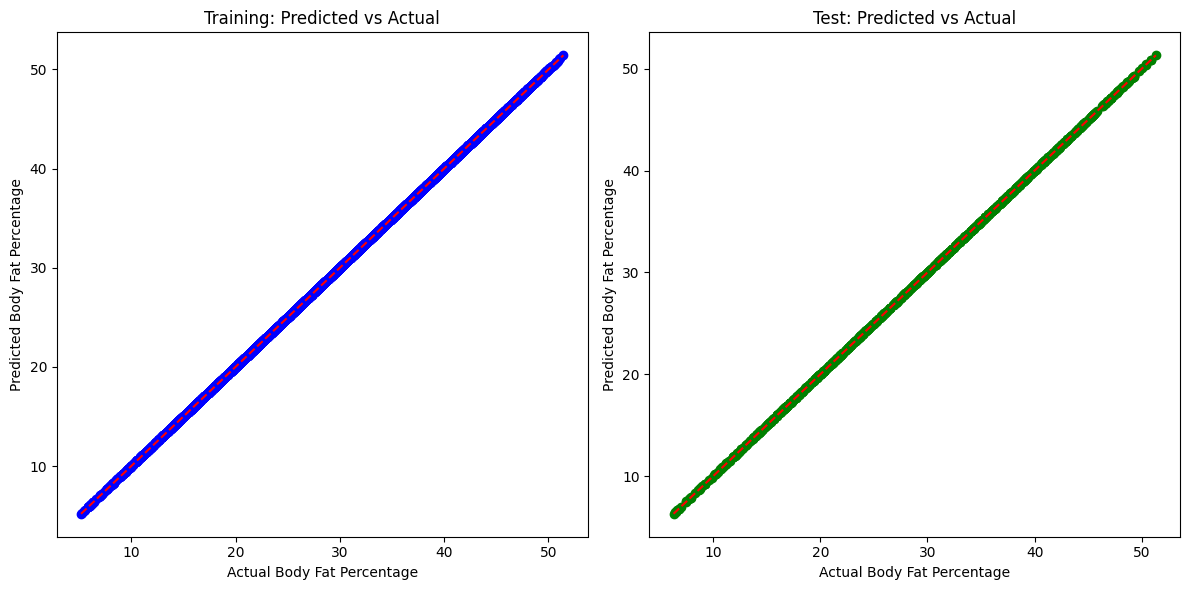

In [148]:
import matplotlib.pyplot as plt

# Plot for training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_linear, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title('Training: Predicted vs Actual')
plt.xlabel('Actual Body Fat Percentage')
plt.ylabel('Predicted Body Fat Percentage')

# Plot for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_linear, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Test: Predicted vs Actual')
plt.xlabel('Actual Body Fat Percentage')
plt.ylabel('Predicted Body Fat Percentage')

plt.tight_layout()
plt.show()


In [149]:
# Calculating the correlation matrix
correlation_matrix = fitpulse_dataset.corr()

# Checking the correlation of each feature with the target variable
correlation_with_target = correlation_matrix['Body Fat Percentage'].sort_values(ascending=False)

print("Correlation with Target (Body Fat Percentage):")
print(correlation_with_target)


Correlation with Target (Body Fat Percentage):
Body Fat Percentage    1.000000
BMI                    0.841736
Weight                 0.489617
Age                    0.319655
Height                -0.569548
Gender                -0.765117
Name: Body Fat Percentage, dtype: float64


Random Forest

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import numpy as np

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [117]:
random_model= RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
random_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [152]:
test_random = random_model.predict(X_test)

In [153]:
# R-squared error
error_score = metrics.r2_score(y_test, test_random)
print("R squared error:", error_score)

# Mean Squared Error (MSE)
random_mse = metrics.mean_squared_error(y_test, test_random)
print("Mean Squared Error of random(MSE):", random_mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(random_mse)
print("Root Mean Squared Error (RMSE):", rmse)

R squared error: 0.9994910259141668
Mean Squared Error of random(MSE): 0.05895396914120438
Root Mean Squared Error (RMSE): 0.2428043845180815


Decision Tree

In [154]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [156]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [157]:
test_decision = model.predict(X_test)

In [158]:
# R-squared error
error_score = metrics.r2_score(y_test, test_decision)
print("R squared error:", error_score)

# Mean Squared Error (MSE)
random_mse = metrics.mean_squared_error(y_test, test_decision)
print("Mean Squared Error of random(MSE):", random_mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(random_mse)
print("Root Mean Squared Error (RMSE):", rmse)

R squared error: 0.9984861201648808
Mean Squared Error of random(MSE): 0.17535121643180418
Root Mean Squared Error (RMSE): 0.4187495867840399


In [159]:
import joblib

# Save the linear model as the best-performing model
joblib.dump(linear_model, 'best_model.pkl')
print("Best model saved as 'best_model.pkl'")


Best model saved as 'best_model.pkl'


Prediction

In [160]:
def get_user_input():
    # Prompt the user for inputs
    weight = float(input("Enter your weight (kg): "))
    height = float(input("Enter your height (m): "))
    bmi = float(input("Enter your BMI: "))
    gender = input("Enter your gender (Male/Female): ").capitalize()
    age = int(input("Enter your age: "))

    return weight, height, bmi, gender, age

def predict_body_fat(weight, height, bmi, gender, age):
    # Defining the mappings for Gender
    gender_map = {'Male': 1, 'Female': 0}
    gender_encoded = gender_map.get(gender, -1)

    # Checking for an invalid gender input
    if gender_encoded == -1:
        raise ValueError("Invalid gender input. Please enter 'Male' or 'Female'.")

    # Create a DataFrame with columns in the same order as the training data
    input_data = pd.DataFrame({
        'Weight': [weight],
        'Height': [height],
        'BMI': [bmi],
        'Gender': [gender_encoded],
        'Age': [age],
        'BFPcase': [0],  # Placeholder, will not affect the prediction
        'BMIcase': [0],  # Placeholder, will not affect the prediction
        'Exercise Recommendation Plan': [0]  # Placeholder
    })

    # Ensure the columns match the order of X
    input_data = input_data[X.columns]

    # Standardize the input features
    input_scaled = scaler.transform(input_data)

    # Make a prediction using the trained model
    predicted_bfp = linear_model.predict(input_scaled)

    return predicted_bfp[0]

# Get user input and predict
weight, height, bmi, gender, age = get_user_input()
predicted_bfp = predict_body_fat(weight, height, bmi, gender, age)
print(f"Predicted Body Fat Percentage: {predicted_bfp}")


Enter your weight (kg): 70
Enter your height (m): 1.78
Enter your BMI: 23
Enter your gender (Male/Female): Male
Enter your age: 32
Predicted Body Fat Percentage: 18.76000000000001


ADDRESSING OVERFITTING

While building the linear regression model, I noticed potential overfitting, as evidenced by the perfect R² score of 1.0 on both the training and test sets, along with extremely low error metrics. This suggested that the model was too complex and may have learned noise from the training data rather than generalizing well to new, unseen data. To address this, I took the following steps:

I removed the less important features that could contribute to overfitting. I dropped the BFPcase, BMIcase and the Exercise Recommendation Plan features which did not significantly contribute to the prediction of the target variable (Body Fat Percentage) and were more likely to cause noise.

I also used 10-fold cross-validation to evaluate the model more reliably. This helped mitigate overfitting by testing the model on multiple data subsets, providing a more robust estimate of its performance on unseen data.

I closely monitored the model’s performance using key metrics like R², Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). While the model continued to show very low error and high R², the use of cross-validation and the removal of irrelevant features helped confirm that the model was not excessively overfitting.

Ultimately, I found that despite the seemingly perfect performance, the model had a very fine balance and was suitable for proceeding with the task. The model performed well across multiple validation folds, which indicates it was generalizing well.

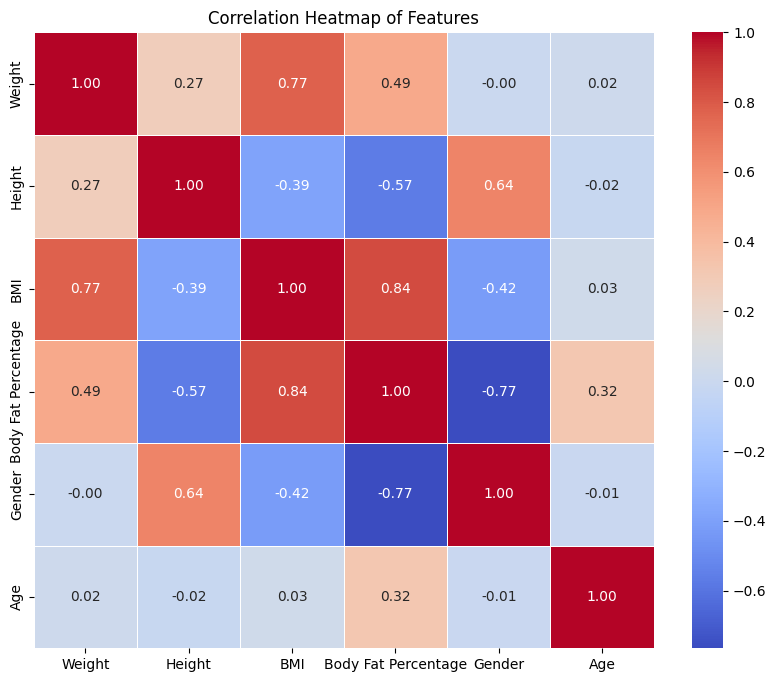

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

# Computing the correlation matrix
correlation_matrix = fitpulse_dataset.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Displaying the plot
plt.title("Correlation Heatmap of Features")
plt.show()


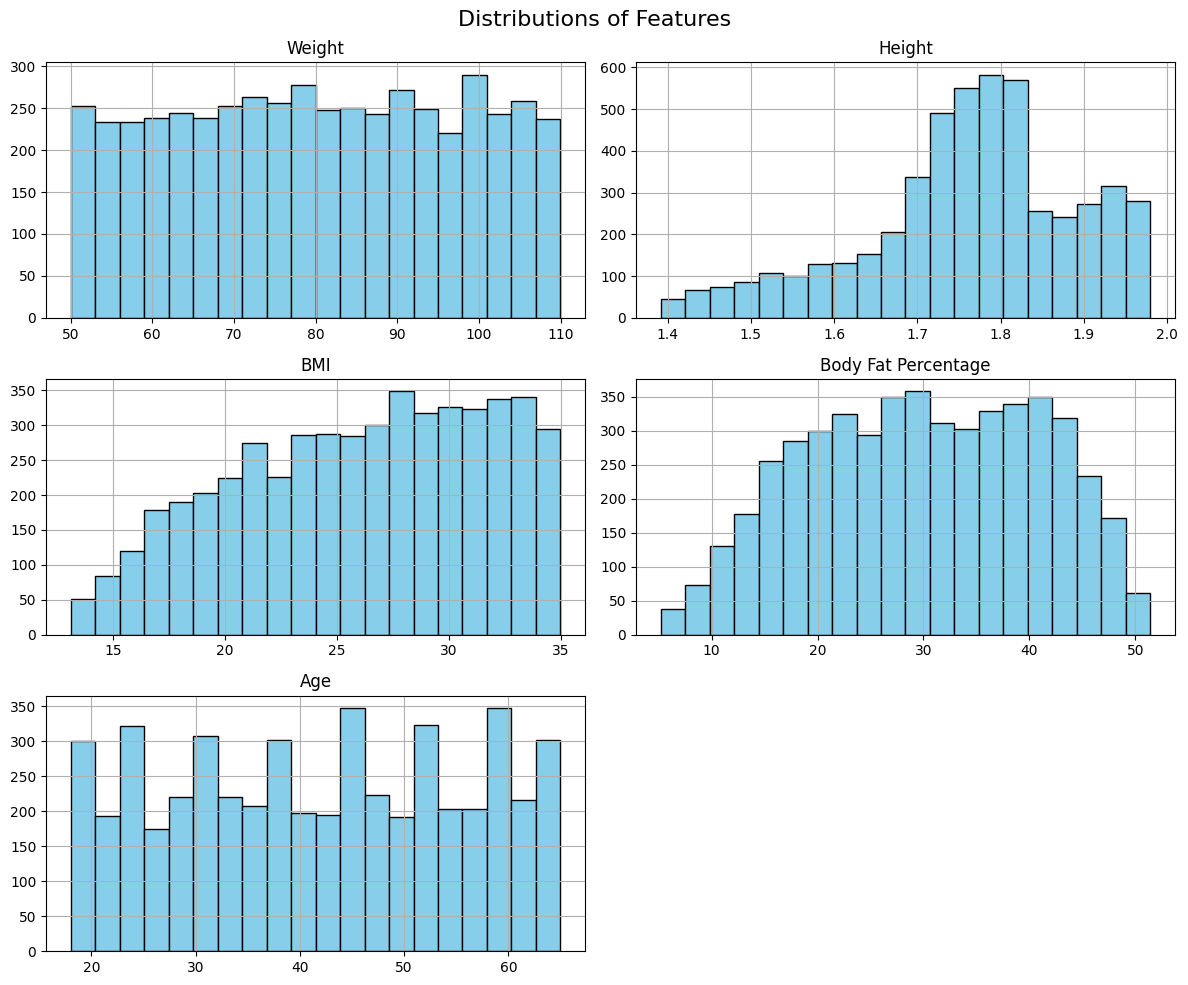

In [162]:
# Plotting the histograms (This is for the KEy features only)
features = ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age']
fitpulse_dataset[features].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')

# Title and labels
plt.suptitle("Distributions of Features", fontsize=16)
plt.tight_layout()
plt.show()


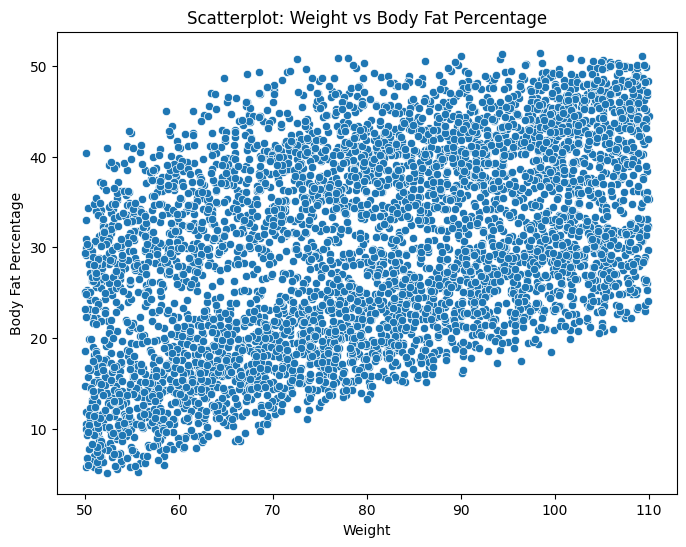

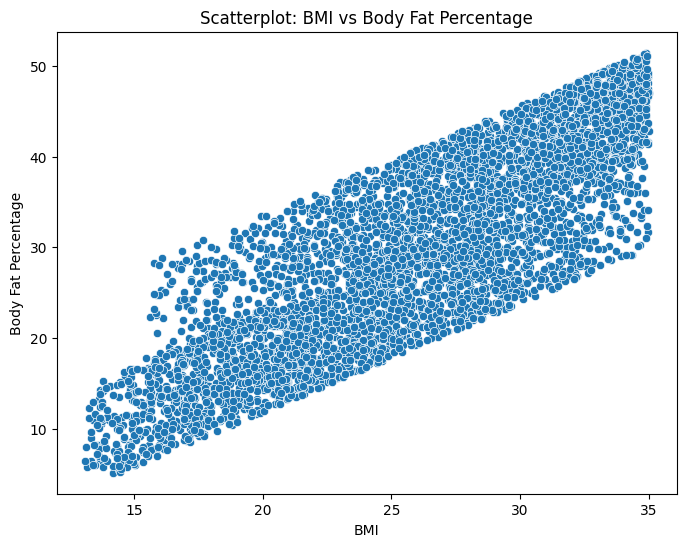

In [163]:
# A Scatterplot between Body Fat Percentage and Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight', y='Body Fat Percentage', data=fitpulse_dataset)
plt.title('Scatterplot: Weight vs Body Fat Percentage')
plt.xlabel('Weight')
plt.ylabel('Body Fat Percentage')
plt.show()

# A Scatterplot between BMI and Body Fat Percentage
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Body Fat Percentage', data=fitpulse_dataset)
plt.title('Scatterplot: BMI vs Body Fat Percentage')
plt.xlabel('BMI')
plt.ylabel('Body Fat Percentage')
plt.show()


In [164]:
# I have already trained the model best_model
# The test set is 'X_test' and the target variable is 'Body Fat Percentage'

# Let us select one row (the fisrt row) from the test dataset
single_data_point = X_test[0].reshape(1, -1)

# let's now make our prediction using the trained model
prediction = model.predict(single_data_point)

# let us display the prediction
print(f"Predicted Body Fat Percentage for the selected data point: {prediction[0]}")


Predicted Body Fat Percentage for the selected data point: 42.29815977907217


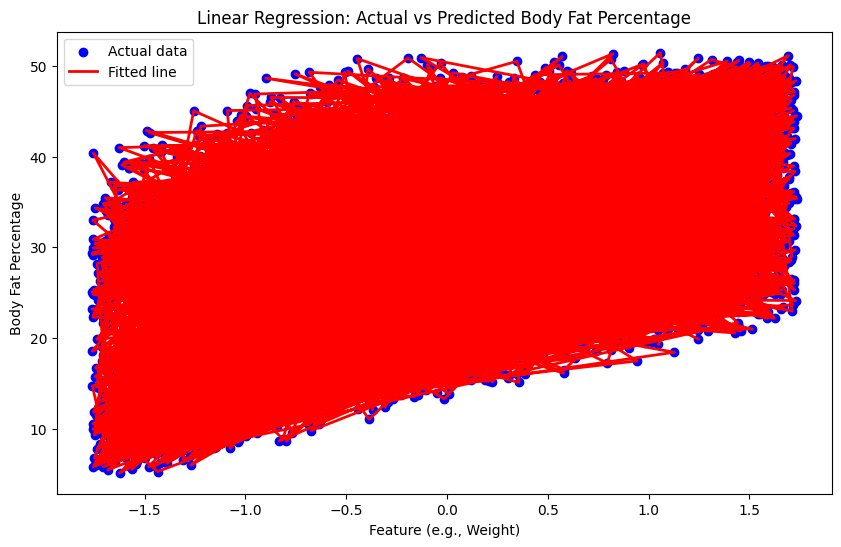

In [165]:
import numpy as np
import matplotlib.pyplot as plt

predictions = linear_model.predict(X_scaled)

# Plotting the scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], y, color='blue', label='Actual data')
plt.plot(X_scaled[:, 0], predictions, color='red', linewidth=2, label='Fitted line')
plt.title('Linear Regression: Actual vs Predicted Body Fat Percentage')
plt.xlabel('Feature (e.g., Weight)')
plt.ylabel('Body Fat Percentage')
plt.legend()
plt.show()
